In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

2025-08-01 05:19:00.757695: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-01 05:19:00.764040: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-01 05:19:00.779740: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754025540.806414    5701 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754025540.814686    5701 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754025540.835061    5701 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
# 1. Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[..., np.newaxis] / 255.0  # Normalize
x_test = x_test[..., np.newaxis] / 255.0


In [4]:
# 2. Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
# 3. Build model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


2025-08-01 05:19:06.377011: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
# 4. Train
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8111 - loss: 0.5195 - val_accuracy: 0.8683 - val_loss: 0.3695
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.8769 - loss: 0.3404 - val_accuracy: 0.8612 - val_loss: 0.3764
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.8932 - loss: 0.2917 - val_accuracy: 0.8972 - val_loss: 0.2871
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.9045 - loss: 0.2598 - val_accuracy: 0.9022 - val_loss: 0.2674
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9139 - loss: 0.2343 - val_accuracy: 0.9021 - val_loss: 0.2669


In [7]:
# 5. Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8960 - loss: 0.2823
Test accuracy: 0.8960


In [8]:
# 6. Predict
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [9]:
# 7. Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))



Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.83      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.78      0.89      0.83      1000
       Dress       0.89      0.92      0.90      1000
        Coat       0.91      0.71      0.80      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.68      0.77      0.72      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



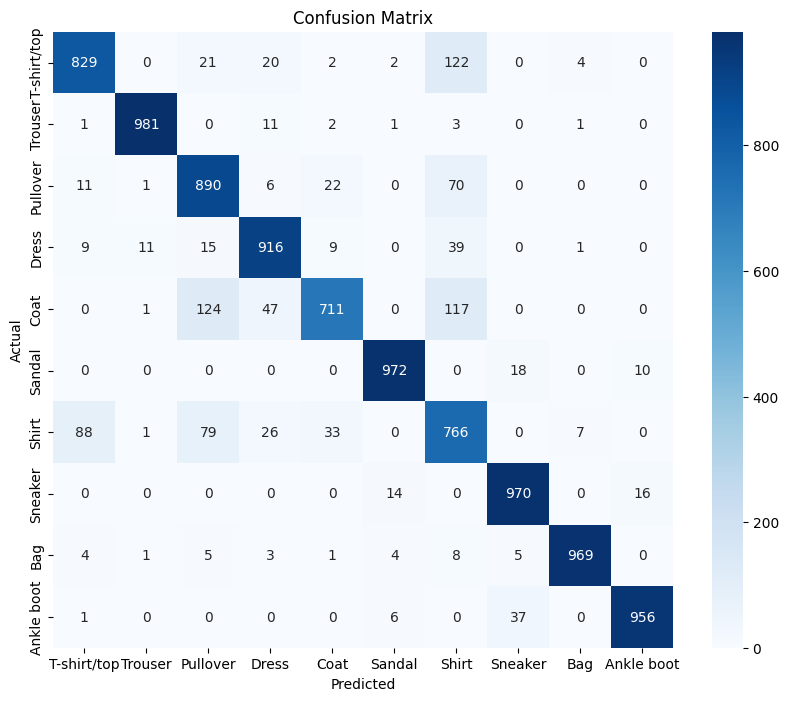

In [10]:
# 8. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

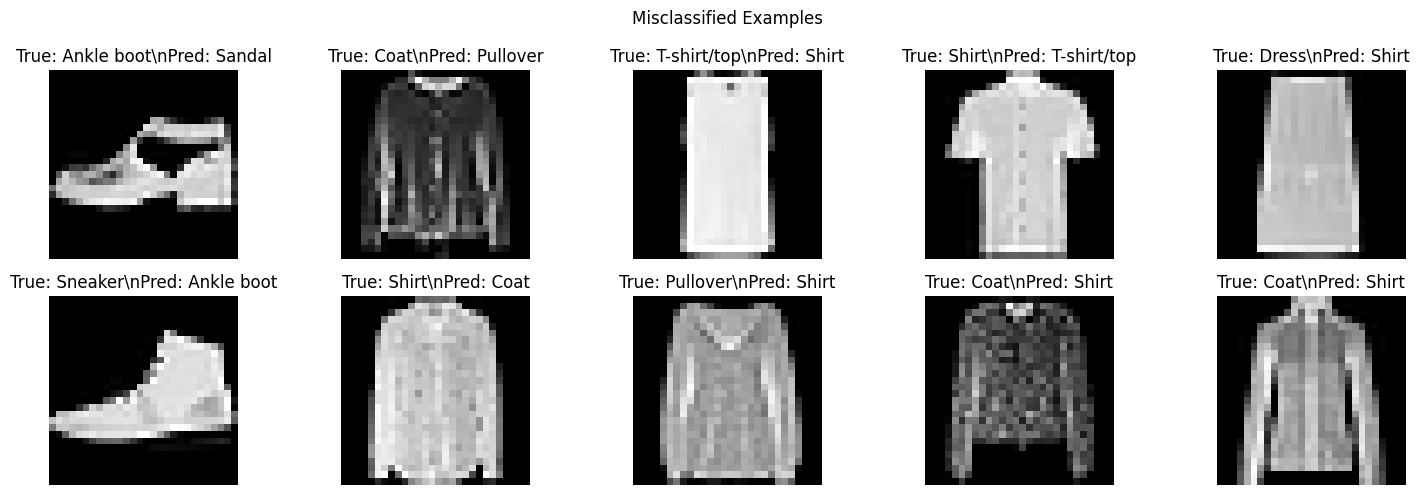

In [ ]:
# 9. Show 10 misclassified images
misclassified_indices = np.where(y_pred != y_test)[0][:10]
plt.figure(figsize=(15, 5))
for i, idx in enumerate(misclassified_indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[y_test[idx]]}\\nPred: {class_names[y_pred[idx]]}")
    plt.axis("off")
plt.suptitle("Misclassified Examples")
plt.tight_layout()
plt.show()